### Student Information
Name: 陳祐瑞 Uray Chaen

Student ID: 110191038

GitHub ID: 148952532

Kaggle name: Uray Chen

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

[Late submission](img/late%20submission.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 

## Load part one train and test data

In [12]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [13]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [14]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [15]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


## save to pickle file part_1_train_df and part_1_test_df

In [16]:
## save to pickle file
train_df.to_pickle("part_1_train_df.pkl") 
test_df.to_pickle("part_1_test_df.pkl")

## load pickle file part_1_train_df and part_1_test_df

In [131]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("part_1_train_df.pkl")
test_df = pd.read_pickle("part_1_test_df.pkl")

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

In [132]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
# Create two CountVectorizer objects for train and test, and get the 30 most frequent words
BOW_vectorizer_train_top30 = CountVectorizer(max_features=30)
BOW_vectorizer_test_top30 = CountVectorizer(max_features=30)

# Convert text in the dataset to feature vectors
count_train=BOW_vectorizer_train_top30.fit_transform(train_df['text'])
count_test=BOW_vectorizer_test_top30.fit_transform(test_df['text'])

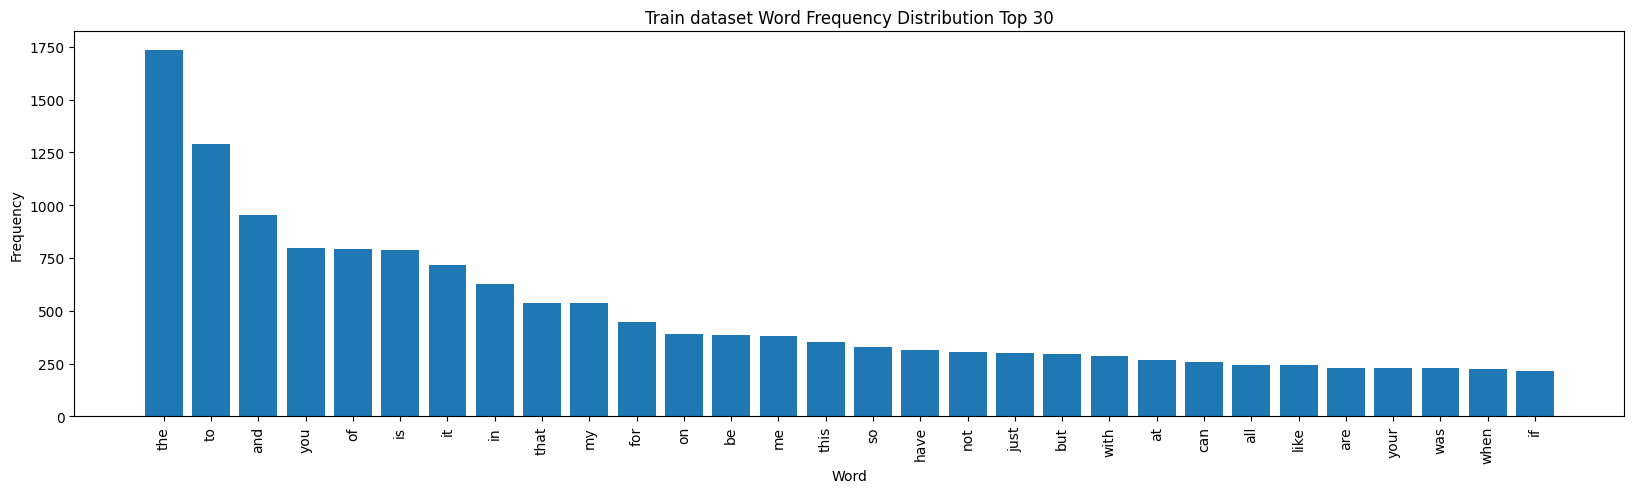

In [133]:
# Calculate the total word frequency in the training dataset
word_freq_train = count_train.sum(axis=0).A1
# Obtain the words from the CountVectorizer
vocabulary_train = BOW_vectorizer_train_top30.get_feature_names_out()
word_freq_dict_train = dict(zip(vocabulary_train, word_freq_train))
# Sort words by frequency to Extract the top 30 words.
top_30_words_train = sorted(word_freq_dict_train, key=word_freq_dict_train.get, reverse=True)[:]
word_freq = [word_freq_dict_train[w] for w in top_30_words_train]

# Create a bar plot to visualize the word frequency distribution for the top 30 words.
plt.figure(figsize=(20,5))
plt.bar(top_30_words_train, word_freq)
plt.xticks(rotation=90)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Train dataset Word Frequency Distribution Top 30')
plt.show()

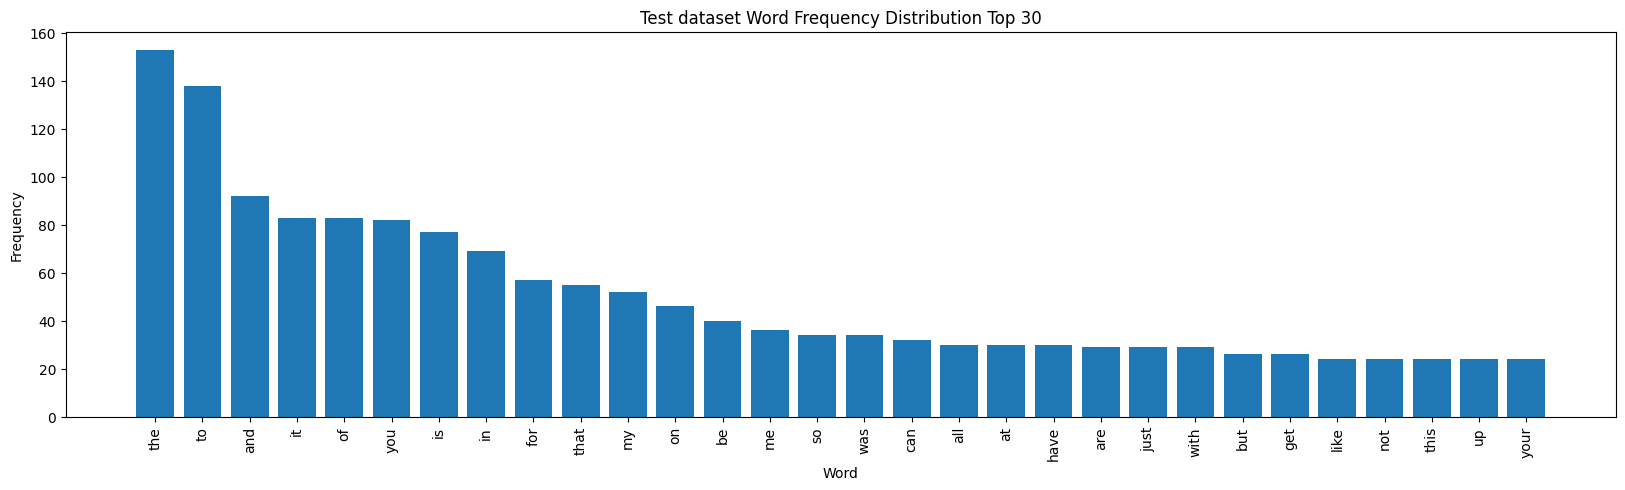

In [134]:
# Calculate the total word frequency in the testing dataset
word_freq_test = count_test.sum(axis=0).A1
# Obtain the words from the CountVectorizer
vocabulary_test = BOW_vectorizer_test_top30.get_feature_names_out()
word_freq_dict_test = dict(zip(vocabulary_test, word_freq_test))
# Sort words by frequency to Extract the top 30 words.
top_30_words_test = sorted(word_freq_dict_test, key=word_freq_dict_test.get, reverse=True)[:]
word_freq = [word_freq_dict_test[w] for w in top_30_words_test]

# Create a bar plot to visualize the word frequency distribution for the top 30 words.
plt.figure(figsize=(20,5))
plt.bar(top_30_words_test, word_freq)
plt.xticks(rotation=90)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Test dataset Word Frequency Distribution Top 30')
plt.show()

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [135]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
# build analyzers (TfidfVectorizer)
TFIDF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
TFIDF_1000.fit(train_df['text'])

# observe some feature names
feature_names_1000 = TFIDF_1000.get_feature_names_out()
feature_names_1000[100:110]

array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [136]:
from sklearn.tree import DecisionTreeClassifier
import nltk

# Build analyzers (bag-of-words) with a maximum of 500 features and using NLTK's word tokenizer
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])
X_train_part1 = BOW_500.transform(train_df['text']) # Transform training text to feature vectors
y_train_part1 = train_df['emotion'] # Set the target variable for training data

# Apply the same analyzer to the testing data
X_test_part1 = BOW_500.transform(test_df['text']) # Transform testing text to feature vectors
y_test_part1 = test_df['emotion']  # Set the target variable for testing data

# Print shapes to verify dimensions
print('X_train.shape: ', X_train_part1.shape)
print('y_train.shape: ', y_train_part1.shape)
print('X_test.shape: ', X_test_part1.shape)
print('y_test.shape: ', y_test_part1.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [137]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

# Training the DecisionTree model using the training data
DT_model = DT_model.fit(X_train_part1, y_train_part1)

# Predictions on both training and testing data
y_train_pred = DT_model.predict(X_train_part1)
y_test_pred = DT_model.predict(X_test_part1)

# Calculate accuracy scores for training and testing sets
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train_part1, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test_part1, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

# Calculate precision, recall, and F1-score for the testing set
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test_part1, y_pred=y_test_pred))

training accuracy: 0.99
testing accuracy: 0.68
              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [138]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix(y_true=y_test_part1, y_pred=y_test_pred) 

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
# Define a function for plotting the confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort() # Sort classes
    tick_marks = np.arange(len(classes))    
    
    # Create a plot for the confusion matrix
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # Set labels and title for the plot
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           ylabel = 'True label',
           xlabel = 'Predicted label')

    fmt = 'd' # Format for displaying the values in cells
    thresh = cm.max() / 2.   # Threshold for text coloring
    # Add text annotations to the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    # Set ylim and adjust layout for better visualization
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

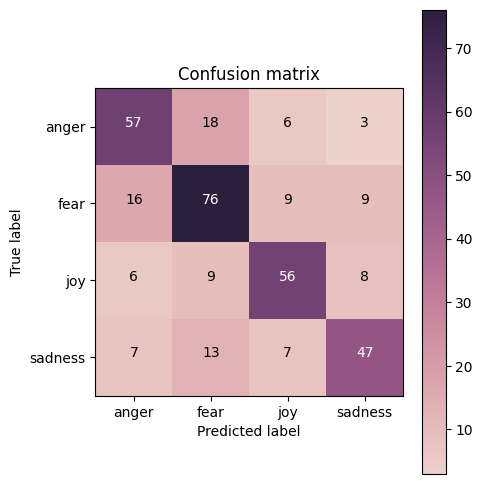

In [139]:
# Plot the confusion matrix using the defined function
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

<font color=lightblue>From the above results, we can observe that the overall accuracy of the model is 0.68, precision is between 0.66 and 0.72, recall is between 0.64 and 0.71, F1 score is between 0.67 and 0.71, and by observing the confusion matrix , we can find that the number of FN and FP predicted by each emotion label is close, so the precision, recall, and f1-score scores of each emotion label are not very different from each other, and the precision, recall, and f1-score of the same emotion label are not very different. The difference is not big, which means that the model prediction is stable and will not be particularly biased towards a certain label. The only shortcoming is that the accuracy is not high, which means that although the prediction is stable, it is not accurate enough.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [140]:
from sklearn.naive_bayes import MultinomialNB
# Create a Multinomial Naive Bayes model
Mnb=MultinomialNB()

## training
Mnb = Mnb.fit(X_train_part1, y_train_part1)
## predict
y_train_pred_Mnb = Mnb.predict(X_train_part1)
y_test_pred_Mnb = Mnb.predict(X_test_part1)

acc_train_Mnb = accuracy_score(y_true=y_train_part1, y_pred=y_train_pred_Mnb)
acc_test_Mnb = accuracy_score(y_true=y_test_part1, y_pred=y_test_pred_Mnb)

print('training accuracy: {}'.format(round(acc_train_Mnb, 2)))
print('testing accuracy: {}'.format(round(acc_test_Mnb, 2)))

## precision, recall, f1-score
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test_part1, y_pred=y_test_pred_Mnb))

training accuracy: 0.79
testing accuracy: 0.7
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



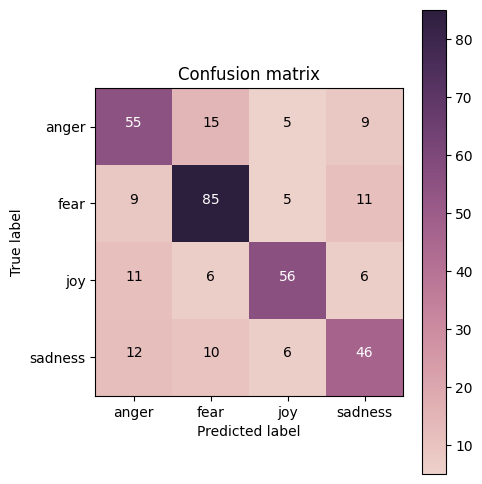

In [141]:
cm2 = confusion_matrix(y_true=y_test_part1, y_pred=y_test_pred_Mnb) 
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm2, classes=my_tags, title='Confusion matrix')

<font color=lightblue>From the above results, we can observe that the overall accuracy of the model is 0.7, precision is between 0.63 and 0.78, recall is between 0.62 and 0.77, F1 score is between 0.63 and 0.75, and by observing the confusion matrix , we can find that the number of FN and FP predicted by each emotion label is close, so the scores of precision, recall, and f1-score of each emotion label are not very different, which means that the model prediction is stable and will not be particularly biased towards a certain label. From f1 - In the score, we can find that MultinomialNB has better prediction ability for fear and joy than other labels. The only drawback is that the accuracy is not high, which means that although the prediction is stable, it is not accurate enough.

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

Decision Tree model
training accuracy: 0.99
testing accuracy: 0.68
              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



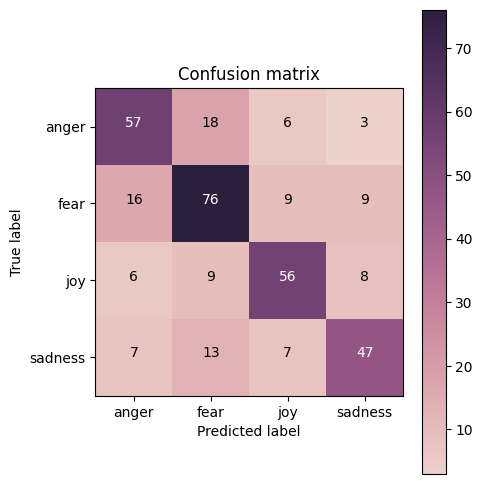

In [142]:
print('Decision Tree model')
print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))
print(classification_report(y_true=y_test_part1, y_pred=y_test_pred))
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

Naive Bayes model
training accuracy: 0.79
testing accuracy: 0.7
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



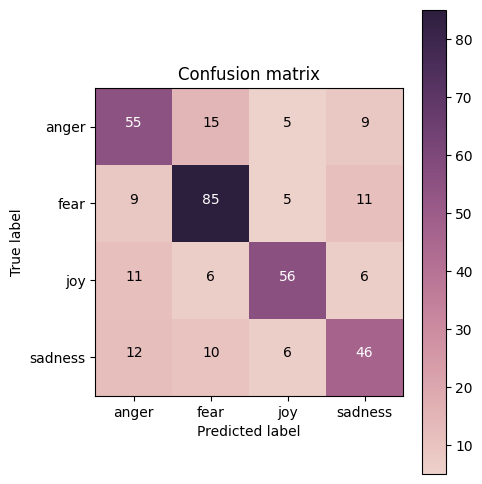

In [143]:
print('Naive Bayes model')
print('training accuracy: {}'.format(round(acc_train_Mnb, 2)))
print('testing accuracy: {}'.format(round(acc_test_Mnb, 2)))
print(classification_report(y_true=y_test_part1, y_pred=y_test_pred_Mnb))
plot_confusion_matrix(cm2, classes=my_tags, title='Confusion matrix')

<font color=lightblue>Through the confusion matrix, we can find that among the performance of the two models, the Naive Bayes model is better at predicting fear. Although the f1-score of the Naive Bayes model for predicting anger and sadness seems much worse than the Decision Tree, in fact TP is only There is a difference of one or two, but because the sample size is small, the difference seems to be large, but in fact there is no difference. Therefore, the biggest difference between the two models is still the predictive ability of fear.

<font color=lightblue>Naive Bayes assumes that features are independent, so it is suitable for processing sparse matrices, and its predictive ability for specific emotion categories is better than Decision Tree (in this result we know it is fear)

<font color=lightblue>Decision Tree performs segmentation based on the nonlinear relationship between features and can handle nonlinear problems. It can generate rules with strong interpretability, but is prone to poor generalization ability. This explains why Decision Tree's prediction accuracy for the train dataset is as high as 0.99 and Naive Bayes's prediction accuracy for the train dataset is only 0.79. However, the prediction accuracy for the test dataset is that Naive Bayes is slightly better than Decision Tree.

<font color=lightblue>Finally, we also found that among the four emotions of anger, fear, joy, and sadness, anger, fear, and sadness are all negative emotions. We speculate that the words may be very similar. Therefore, from the confusion matrix, we can see that anger , the three emotions of fear and sadness are easily misjudged.

In [144]:
#reset X_train_part1, y_train_part1, X_test_part1, y_test_part1
X_train_part1 = BOW_500.transform(train_df['text'])
y_train_part1 = train_df['emotion']

X_test_part1 = BOW_500.transform(test_df['text'])
y_test_part1 = test_df['emotion']

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

In [145]:
## deal with label (string -> one-hot)
import keras
from sklearn.preprocessing import LabelEncoder

# Initialize and fit a LabelEncoder on the training labels
label_encoder = LabelEncoder()
label_encoder.fit(y_train_part1)

# Display the unique classes that were encoded
print('check label: ', label_encoder.classes_)

# Function to encode labels into one-hot vectors
def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

# Function to decode one-hot vectors back into labels
def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

# Encode both training and testing labels into one-hot vectors
y_train_part1 = label_encode(label_encoder, y_train_part1)
y_test_part1 = label_encode(label_encoder, y_test_part1)

# Display shapes after the label conversion
print('\n\n## After convert')
print('\ny_train.shape: ', y_train_part1.shape)
print('y_test.shape: ', y_test_part1.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']


## After convert

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [146]:
# I/O check
input_shape = X_train_part1.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

input_shape:  500
output_shape:  4


In [147]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training NN model
history = model.fit(X_train_part1, y_train_part1, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test_part1, y_test_part1))
print('training finish')

# Make predictions on the test data using the trained model
pred_result = model.predict(X_test_part1, batch_size=128)
# Decode the predicted results from one-hot vectors back to labels
pred_result = label_decode(label_encoder, pred_result)
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test_part1), pred_result), 2)))

Epoch 1/25


113/113 [==============================] - 1s 2ms/step - loss: 1.3277 - accuracy: 0.3651 - val_loss: 1.2790 - val_accuracy: 0.4496
Epoch 2/25
113/113 [==============================] - 0s 1ms/step - loss: 0.9847 - accuracy: 0.6471 - val_loss: 0.8931 - val_accuracy: 0.6686
Epoch 3/25
113/113 [==============================] - 0s 1ms/step - loss: 0.5795 - accuracy: 0.7935 - val_loss: 0.7537 - val_accuracy: 0.7003
Epoch 4/25
113/113 [==============================] - 0s 1ms/step - loss: 0.4087 - accuracy: 0.8511 - val_loss: 0.7741 - val_accuracy: 0.7061
Epoch 5/25
113/113 [==============================] - 0s 1ms/step - loss: 0.3358 - accuracy: 0.8774 - val_loss: 0.8129 - val_accuracy: 0.7061
Epoch 6/25
113/113 [==============================] - 0s 1ms/step - loss: 0.2709 - accuracy: 0.9042 - val_loss: 0.8493 - val_accuracy: 0.6830
Epoch 7/25
113/113 [==============================] - 0s 1ms/step - loss: 0.2237 - accuracy: 0.9239 - val_loss: 0.8882 - val_accuracy: 0.6888
Epoch 8/25
113/11

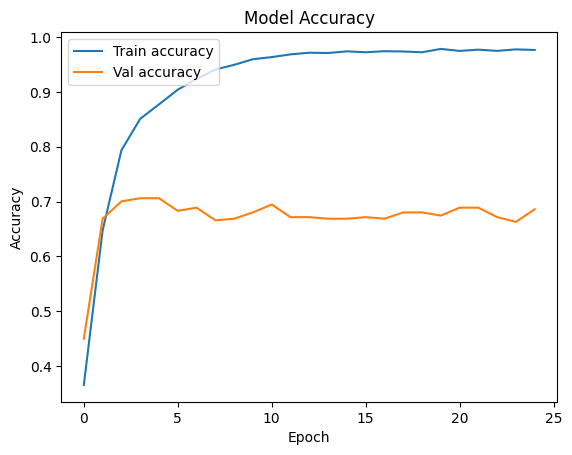

In [148]:
import matplotlib.pyplot as plt

# Plotting the training and validation accuracy from the 'history' object
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train accuracy', 'Val accuracy'], loc='upper left')
plt.show()

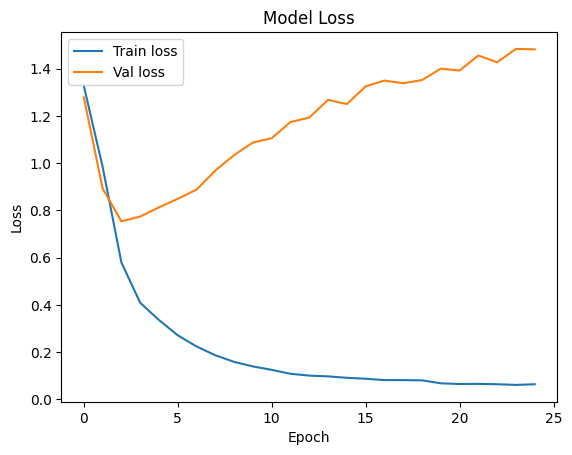

In [149]:
# Plotting the training and validation loss from the 'history' object
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train loss', 'Val loss'], loc='upper left')
plt.show()

<font color=lightblue>From the chart Model Accuracy, we can observe that the Train accuracy will continue to improve as training progresses. Val accuracy rises rapidly in the first few epochs, but stops rising after about the fifth epoch, and fluctuates in a specific interval below the Train accuracy line. From Model Loss, we can observe that Train loss will gradually decrease as training progresses, while Val loss decreases rapidly at the beginning, but from about the fifth epoch onwards, Val loss gradually increases, and Val loss The loss line is higher than the Train loss line.
<font color=lightblue>From the distribution of the Train and Validation lines of the chart Model Accuracy and Model Loss, we can see that the model's prediction accuracy for Train data is very high, but its prediction performance for Validation data is very low, which means that the model lacks generalization ability, which is the so-called Overfitting.

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?

In [150]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
training_corpus = train_df['text_tokenized'].values
test_df['text_tokenized'] = test_df['text'].apply(lambda x: nltk.word_tokenize(x))

In [151]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

load ok


In [152]:
import numpy as np

def sentence_vector(tokens):
    word_vectors = []
    for word in tokens:
        # Check if the word exists in the Word2Vec model's index
        if word in w2v_google_model.key_to_index:
            # Convert words found in the model's index to vectors and append to word_vectors list
            word_vectors.append(w2v_google_model[word])
    # If no vectors representing words are found, return None
    if not word_vectors:
        return None
    # Compute the sentence vector using the weighted average, assuming equal weights for all words
    return np.mean(word_vectors, axis=0)

# Convert each text's tokenized list into a corresponding sentence vector
train_df['sentence_vector'] = train_df['text_tokenized'].apply(lambda x: sentence_vector(x))
# Print the sentence vector for the first text
print(train_df['sentence_vector'][0])


[ 0.03489287 -0.00119549  0.06909843  0.0999119  -0.03646983 -0.02041759
 -0.02931811 -0.10570227  0.13801642  0.10061115  0.01449884 -0.04699972
 -0.05617158 -0.01869268 -0.11240553  0.04212487  0.0696995   0.06736954
 -0.00087439  0.03100055  0.04348888  0.06342349  0.11340067 -0.03367781
 -0.07039742  0.05377429 -0.1092317   0.0749327   0.05811277  0.03175155
 -0.00081402  0.04208175 -0.00018377 -0.05554332 -0.00327351  0.05981445
  0.02781478  0.08692601 -0.03651229  0.08925595  0.05007072 -0.12937462
  0.16029955 -0.03982411 -0.03067415  0.02346868 -0.06574813 -0.07549784
  0.010713   -0.03259145 -0.16483738  0.11107602  0.00544274  0.02107504
  0.00555951  0.03455386 -0.04232125 -0.10246078  0.0731785  -0.06427798
 -0.01924465  0.01556131 -0.08708655 -0.02296779 -0.0654403  -0.11012135
 -0.04413041  0.00754448 -0.01910102  0.05538343  0.05809486  0.03108282
  0.12954447 -0.02607528 -0.17056407 -0.03897227  0.04867288  0.07010684
  0.02716761  0.04018767 -0.03628673 -0.02752354  0

<font color=lightblue>When we have Word Embeddings, you can use the average Pooling method to generate the embedding vector of the entire sentence (Sentence Embedding). This means summing up the embedding vectors for each word in the sentence and averaging them.

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'angry', 'irate'

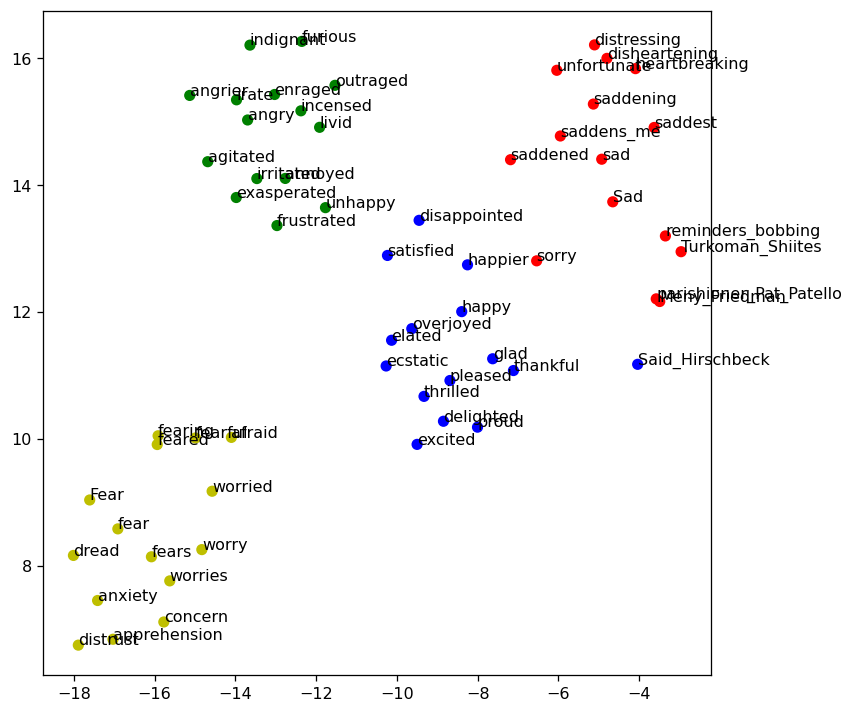

In [156]:
word_list = ["angry", "happy", "sad", "fear"]

topn = 15
# Retrieve the most similar words to 'happy', 'angry', 'sad', and 'fear'
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn-1)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn-1)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn-1)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn-1)]        

# Display the most similar words for each emotion
print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

# Create a list of target words
target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

# Create a color list for plotting
print('\ncolor list:')
cn = topn
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

# Training t-SNE
X_tsne = tsne.fit_transform(X_train)

# Plot the t-SNE result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

<font color=lightblue> The blue dots represent happy_words, the green dots represent angry_words, the red dots represent sad_words, and the yellow dots represent fear_words.

<font color=lightblue> From the figure, we can observe that the distribution of fear_words is far away from the words of other emotions, which means that the words related to fear_words are easier to distinguish. Happy_words is distributed adjacent to angry_words and sad_words, so we can speculate that distinguishing happy_words may be confused with angry_words and sad_words

2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2.

In [48]:
import pandas as pd
# Read JSON file and select specific columns
tweet_id = []
text=[]
tweet_data = pd.read_json("kaggle competition data sets/tweets_DM.json", lines=True)
tweet_data=tweet_data['_source'].to_dict()
# Extract 'tweet_id' and 'text' columns from the JSON data
for i in tweet_data:
    tweet_id.append(tweet_data[i]['tweet']['tweet_id'])
    text.append(tweet_data[i]['tweet']['text'])

# Create DataFrames for 'tweet_id' and 'text'
tweet_id=pd.DataFrame(tweet_id)
text=pd.DataFrame(text)
# Concatenate 'tweet_id' and 'text' DataFrames into a new DataFrame
tweets_DM = pd.concat([tweet_id, text], axis=1)

# Rename columns in the new DataFrame
tweets_DM.columns = ['tweet_id', 'text']
display(tweets_DM)

,tweet_id,text
0,0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,0x28b412,"Confident of your obedience, I write to you, k..."
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...
1867530,0x316b80,When you buy the last 2 tickets remaining for ...
1867531,0x29d0cb,I swear all this hard work gone pay off one da...
1867532,0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,0x24faed,"Ah, corporate life, where you can date <LH> us..."


In [49]:
import pandas as pd
# Read data from CSV files ('data_identification.csv' and 'emotion.csv') with specified column names
data_identification = pd.read_csv("kaggle competition data sets/data_identification.csv", engine='python', names=["tweet_id", "identification"])
data_identification=data_identification.drop(data_identification.index[0])
emotion = pd.read_csv("kaggle competition data sets/emotion.csv", engine='python', names=["tweet_id", "emotion"])
emotion=emotion.drop(emotion.index[0]) # Dropping the header row

In [50]:
# Merging tweets_DM DataFrame with data_identification DataFrame on 'tweet_id' column
df = pd.merge(tweets_DM, data_identification, on='tweet_id')

# Reordering the columns in the DataFrame
df = df[['tweet_id', 'text', 'identification']]

# Displaying the merged DataFrame
display(df)

,tweet_id,text,identification
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",train
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train
2,0x28b412,"Confident of your obedience, I write to you, k...",test
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train
4,0x2de201,"""Trust is not the same as faith. A friend is s...",test
...,...,...,...
1867530,0x316b80,When you buy the last 2 tickets remaining for ...,test
1867531,0x29d0cb,I swear all this hard work gone pay off one da...,test
1867532,0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...,test
1867533,0x24faed,"Ah, corporate life, where you can date <LH> us...",train


In [51]:
# Filter rows with 'identification' as 'train' to create df_train
df_train=df[df['identification']=='train']
# Filter rows with 'identification' as 'test' to create df_test
df_test=df[df['identification']=='test']
# Drop the 'identification' column from df_train and df_test
df_train = df_train.drop('identification', axis=1)
df_test = df_test.drop('identification', axis=1)

# Merge df_train with the emotion DataFrame based on the common 'tweet_id' column
df_train = pd.merge(df_train, emotion, on='tweet_id')

# Rearrange columns in df_train to have 'tweet_id', 'text', and 'emotion' in that order
df_train = df_train[['tweet_id', 'text', 'emotion']]
display(df_train)

,tweet_id,text,emotion
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",anticipation
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",sadness
2,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,fear
3,0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,joy
4,0x2c91a8,Still waiting on those supplies Liscus. <LH>,anticipation
...,...,...,...
1455558,0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,joy
1455559,0x38959e,In every circumtance I'd like to be thankful t...,joy
1455560,0x2cbca6,there's currently two girls walking around the...,joy
1455561,0x24faed,"Ah, corporate life, where you can date <LH> us...",joy


## save to pickle file

In [52]:
## save to pickle file
df_train.to_pickle("df_train.pkl") 
df_test.to_pickle("df_test.pkl")

## load a pickle file

In [24]:
import pandas as pd

## load a pickle file
df_train = pd.read_pickle("df_train.pkl")
df_test = pd.read_pickle("df_test.pkl")

In [25]:
display(df_test)

,tweet_id,text
2,0x28b412,"Confident of your obedience, I write to you, k..."
4,0x2de201,"""Trust is not the same as faith. A friend is s..."
9,0x218443,When do you have enough ? When are you satisfi...
30,0x2939d5,"God woke you up, now chase the day #GodsPlan #..."
33,0x26289a,"In these tough times, who do YOU turn to as yo..."
...,...,...
1867525,0x2913b4,"""For this is the message that ye heard from th..."
1867529,0x2a980e,"""There is a lad here, which hath five barley l..."
1867530,0x316b80,When you buy the last 2 tickets remaining for ...
1867531,0x29d0cb,I swear all this hard work gone pay off one da...


In [26]:
df_train = df_train.sample(frac=1,ignore_index=True)

## overview datasets

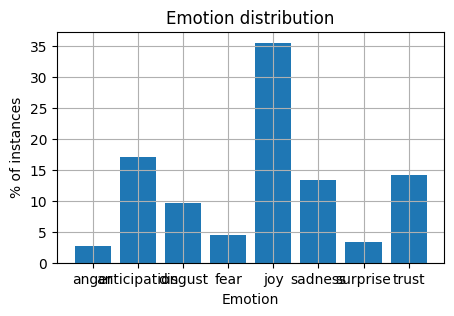

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

# the histogram of the data
labels = df_train['emotion'].unique()
post_total = len(df_train)
df1 = df_train.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

In [28]:
df_train

,tweet_id,text,emotion
0,0x1c829e,I enjoy #fantasy. I even #write it. But I've l...,joy
1,0x332b7f,@natashattodd this is good <LH>,joy
2,0x316a47,When you think you’ve done all YOU can do and ...,joy
3,0x2d1c09,Surprise <LH> Is the best combination,sadness
4,0x212615,"Of knowledge', 'human', should be capable of a...",joy
...,...,...,...
1455558,0x21ef07,That awkward moment when you see a co-worker a...,sadness
1455559,0x35e5a1,@AbdulVogue @PaulaAbdul Love❤️♥️💟💌💘 love you P...,joy
1455560,0x216d3e,And I'll be happy for you If you can be happy ...,joy
1455561,0x226d72,People work hard to look rich .. Not to be rea...,disgust


## data preprocessing

In [29]:
from sklearn.model_selection import train_test_split

X=df_train['text']
y=df_train['emotion']
# Splitting the data into training and testing sets (80% for testing, 20% for training)
# Use 'stratify=y' parameter ensures that the class distribution in the split datasets is similar to the original distribution of the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, stratify=y, random_state=110191038)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# Initializing a TfidfVectorizer with max_features=1000
BOW_vectorizer = TfidfVectorizer(tokenizer=nltk.word_tokenize,max_features=1000) 

# Fitting the vectorizer on the training text data (X_train)
BOW_vectorizer.fit(X_train)

c:\Users\longy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(max_features=1000,
                tokenizer=<function word_tokenize at 0x0000018956050680>)

In [31]:
X_train_BOW = BOW_vectorizer.transform(X_train)
X_test_BOW = BOW_vectorizer.transform(X_test)

In [32]:
## save csr_matrix file and pickle file
from scipy.sparse import save_npz

save_npz("X_train_BOW.npz", X_train_BOW)
save_npz("X_test_BOW.npz", X_test_BOW)
y_train.to_pickle("y_train.pkl")
y_test.to_pickle("y_test.pkl")


In [158]:
from scipy.sparse import load_npz

## save csr_matrix file and pickle file
X_train_BOW = load_npz("X_train_BOW.npz")
X_test_BOW = load_npz("X_test_BOW.npz")
y_train=pd.read_pickle("y_train.pkl")
y_test=pd.read_pickle("y_test.pkl")

### <font color=lightblue> If the traditional oversampling method is used, although the number of niche samples will increase, because it is copying data, it will easily lead to repeated information and overfit the model; if the traditional undersampling method is used, the number of mass samples will be reduced, but it will Part of the information is lost, which can easily lead to underfitting. Therefore, I used an improved version of the oversampling method SMOTE (randomly select a sample from the K nearest neighbor samples for each minority class sample, and randomly select a point from the connection between the two samples as the newly synthesized minority class sample) combined with the undersampling method Tomek Link (treating samples with low discrimination distributed at the boundary as noise and eliminating them) makes the distribution of label attributes close to consistent.
### <font color=lightblue>=>over sampling + under sampling = SMOTETomek

In [34]:
from imblearn.combine import SMOTETomek

# Initializing SMOTETomek
SMTO=SMOTETomek(random_state=110191038)

# Applying SMOTETomek resampling to the training data (X_train_BOW and y_train)
X_train_BOW_SMOTETomek, y_train_SMOTETomek = SMTO.fit_resample(X=X_train_BOW, y=y_train)
print(pd.Series(y_train).value_counts(normalize=True))

emotion
joy             0.354513
anticipation    0.171024
trust           0.141169
sadness         0.132894
disgust         0.095565
fear            0.043969
surprise        0.033479
anger           0.027388
Name: proportion, dtype: float64


In [35]:
print(pd.Series(y_train_SMOTETomek).value_counts(normalize=True))

emotion
anger           0.125202
surprise        0.125174
disgust         0.125148
fear            0.125140
sadness         0.125068
trust           0.124853
anticipation    0.124847
joy             0.124569
Name: proportion, dtype: float64


### <font color=lightblue>We can find that after the calculation of SMOTETomek undersampling + oversampling, the distribution number of labels for each emotion is consistent.

In [36]:
type(X_train_BOW)

scipy.sparse._csr.csr_matrix

In [37]:
type(y_train_SMOTETomek)

pandas.core.series.Series

In [38]:
## save to pickle and npz file
from scipy.sparse import save_npz

save_npz("X_train_BOW_SMOTETomek.npz", X_train_BOW_SMOTETomek)
y_train_SMOTETomek.to_pickle("y_train_SMOTETomek.pkl")

In [39]:
from scipy.sparse import load_npz
import pandas as pd

## load to pickle and npz file
X_train_BOW_SMOTETomek = load_npz("X_train_BOW_SMOTETomek.npz")
y_train_SMOTETomek = pd.read_pickle("y_train_SMOTETomek.pkl")
y_train = pd.read_pickle("y_train.pkl")

In [159]:
print('Before:')
print(y_train.shape)
print(X_train_BOW.shape)
print('After:')
print(y_train_SMOTETomek.shape)
print(X_train_BOW_SMOTETomek.shape)

Before:
(291112,)
(291112, 1000)
After:
(823720,)
(823720, 1000)


## Build various models

In [160]:
from sklearn.tree import DecisionTreeClassifier

# Initialize a Decision Tree Classifier
DT_model = DecisionTreeClassifier(random_state=110191038)

# Train the Decision Tree model using the Bag-of-Words representations of the training data
DT_model = DT_model.fit(X_train_BOW, y_train)
y_test_pred = DT_model.predict(X_test_BOW)
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.16      0.13      0.14     31894
anticipation       0.42      0.41      0.41    199148
     disgust       0.25      0.24      0.24    111281
        fear       0.27      0.23      0.25     51199
         joy       0.51      0.57      0.54    412814
     sadness       0.34      0.33      0.33    154750
    surprise       0.20      0.16      0.18     38983
       trust       0.30      0.28      0.29    164382

    accuracy                           0.40   1164451
   macro avg       0.31      0.29      0.30   1164451
weighted avg       0.39      0.40      0.39   1164451



### <font color=lightblue> The accuracy of the model is 0.4, while the f1-score of macro avg is 0.3. The model has good prediction performance for anticipation and joy, but is not good at predicting anger and surprise.

In [41]:
from sklearn.tree import DecisionTreeClassifier


DT_model = DecisionTreeClassifier(random_state=110191038)

# Train the Decision Tree model using the Bag-of-Words and SMOTETomek representations of the training data
DT_model = DT_model.fit(X_train_BOW_SMOTETomek, y_train_SMOTETomek)

In [42]:

y_test_pred = DT_model.predict(X_test_BOW)

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.12      0.16      0.14     31894
anticipation       0.42      0.40      0.41    199148
     disgust       0.24      0.24      0.24    111281
        fear       0.23      0.28      0.26     51199
         joy       0.52      0.50      0.51    412814
     sadness       0.33      0.32      0.32    154750
    surprise       0.16      0.20      0.18     38983
       trust       0.30      0.29      0.30    164382

    accuracy                           0.38   1164451
   macro avg       0.29      0.30      0.29   1164451
weighted avg       0.38      0.38      0.38   1164451



### <font color=lightblue>The accuracy of the model is 0.38, while the f1-score of macro avg is 0.29. The model has good prediction performance for anticipation and joy, but is not good at predicting anger and surprise.
### <font color=lightblue>Compared with x, y training data that has not been processed by SMOTETomek, its prediction performance is poor

In [45]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
# Initialize AdaBoostClassifier
AdaBoost = AdaBoostClassifier(n_estimators=280,random_state=1104)
# Train the AdaBoost model using the Bag-of-Words representations of the training data
AdaBoost=AdaBoost.fit(X_train_BOW, y_train)
# Make predictions on the Bag-of-Words representations of the test data
y_test_pred_Ada=AdaBoost.predict(X_test_BOW)
print(classification_report(y_true=y_test, y_pred=y_test_pred_Ada))

              precision    recall  f1-score   support

       anger       0.56      0.10      0.17     31894
anticipation       0.54      0.41      0.47    199148
     disgust       0.37      0.25      0.30    111281
        fear       0.63      0.19      0.30     51199
         joy       0.46      0.82      0.59    412814
     sadness       0.47      0.34      0.40    154750
    surprise       0.58      0.14      0.22     38983
       trust       0.52      0.17      0.26    164382

    accuracy                           0.47   1164451
   macro avg       0.52      0.30      0.34   1164451
weighted avg       0.49      0.47      0.43   1164451



### <font color=lightblue>The accuracy of the model is 0.47, while the f1-score of macro avg is 0.34. The model has good prediction performance for anticipation ,sadness and joy, but is not good at predicting anger and surprise.
### <font color=lightblue>Compared with decision trees, it has significantly better prediction performance.

In [161]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
# Initialize AdaBoostClassifier
AdaBoost = AdaBoostClassifier(n_estimators=280,random_state=1104)
# Train the AdaBoost model using the Bag-of-Words representations of the training data
AdaBoost=AdaBoost.fit(X_train_BOW_SMOTETomek, y_train_SMOTETomek)
# Make predictions on the Bag-of-Words representations of the test data
y_test_pred_Ada=AdaBoost.predict(X_test_BOW)
print(classification_report(y_true=y_test, y_pred=y_test_pred_Ada))

              precision    recall  f1-score   support

       anger       0.14      0.22      0.17     31894
anticipation       0.48      0.40      0.44    199148
     disgust       0.27      0.33      0.30    111281
        fear       0.23      0.34      0.28     51199
         joy       0.51      0.51      0.51    412814
     sadness       0.41      0.33      0.37    154750
    surprise       0.21      0.19      0.20     38983
       trust       0.32      0.32      0.32    164382

    accuracy                           0.40   1164451
   macro avg       0.32      0.33      0.32   1164451
weighted avg       0.41      0.40      0.40   1164451



### <font color=lightblue>The accuracy of the model is 0.40, while the f1-score of macro avg is 0.32. The model has good prediction performance for anticipation, joy, and sadness, but is not good at predicting anger and surprise.
### <font color=lightblue>Compared with x, y training data that has not been processed by SMOTETomek, its prediction performance is poor

### <font color=lightblue>Although according to my previous experience in training models, the prediction performance of the model can be improved after SMOTETomek sampling processing, but in this training, I found that SMOTETomek sampling processing actually reduced the model performance. Therefore, I think SMOTETomek sampling processing is not suitable for use. in language processing

In [53]:
df_test

,tweet_id,text
2,0x28b412,"Confident of your obedience, I write to you, k..."
4,0x2de201,"""Trust is not the same as faith. A friend is s..."
9,0x218443,When do you have enough ? When are you satisfi...
30,0x2939d5,"God woke you up, now chase the day #GodsPlan #..."
33,0x26289a,"In these tough times, who do YOU turn to as yo..."
...,...,...
1867525,0x2913b4,"""For this is the message that ye heard from th..."
1867529,0x2a980e,"""There is a lad here, which hath five barley l..."
1867530,0x316b80,When you buy the last 2 tickets remaining for ...
1867531,0x29d0cb,I swear all this hard work gone pay off one da...


In [54]:
# Extract the 'text' column from the df_test DataFrame
df_test_text=df_test['text']
# Transform the text data from the test set using the previously trained BOW_vectorizer
df_test_text=BOW_vectorizer.transform(df_test_text)

In [58]:
# Use the trained AdaBoost model to predict the labels for the transformed test text data
df_test_predictions=AdaBoost.predict(df_test_text)

# Create a DataFrame output_df with columns 'id' and 'emotion' using test tweet IDs and predicted emotions
output_df=pd.DataFrame({'id': df_test['tweet_id'], 'emotion': df_test_predictions})

# Write the DataFrame to a CSV file named 'Adaboost.csv', excluding the index column
output_df.to_csv('Adaboost.csv', index=False)

In [59]:
from catboost import CatBoostClassifier
# Initialize CatBoostClassifier with GPU mode
CatBoost = CatBoostClassifier(random_seed=1104,task_type="GPU",verbose=False,iterations=1620)

# Train the CatBoost model using the Bag-of-Words representations of the training data
CatBoost=CatBoost.fit(X_train_BOW, y_train)
# Make predictions on the Bag-of-Words representations of the test data
y_test_pred_Cat=CatBoost.predict(X_test_BOW)
print(classification_report(y_true=y_test, y_pred=y_test_pred_Cat))

              precision    recall  f1-score   support

       anger       0.75      0.10      0.18     31894
anticipation       0.62      0.47      0.53    199148
     disgust       0.43      0.27      0.33    111281
        fear       0.70      0.24      0.35     51199
         joy       0.49      0.85      0.62    412814
     sadness       0.47      0.41      0.44    154750
    surprise       0.77      0.15      0.25     38983
       trust       0.63      0.23      0.33    164382

    accuracy                           0.51   1164451
   macro avg       0.61      0.34      0.38   1164451
weighted avg       0.55      0.51      0.48   1164451



### <font color=lightblue>The accuracy of the model is 0.51, while the f1-score of macro avg is 0.38. The model has good prediction performance for anticipation ,sadness and joy, but is not good at predicting anger.
### <font color=lightblue>Compared with decision trees and adaboost, it has significantly better prediction performance.

In [60]:
from sklearn.preprocessing import LabelEncoder
import keras

# Initialize a LabelEncoder to transform target labels into encoded integers
label_encoder = LabelEncoder()

# Fit the LabelEncoder to the training labels (y_train) to establish unique class mappings
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)

def label_encode(le, labels):
    # Transform input labels into encoded integers using the provided LabelEncoder
    enc = le.transform(labels)
    # Convert the encoded integer labels into categorical format using Keras utilities
    return keras.utils.to_categorical(enc)

# Encode the training labels (y_train) into categorical format using the label_encode function
y_train = label_encode(label_encoder, y_train)


check label:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']


In [61]:
input_shape = X_train_BOW.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  1000
output_shape:  8


## NN

In [83]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax
from keras.layers import Dropout

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X1 = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X1)  # 64
H1 = ReLU()(X_W1)
H1_dropout = Dropout(0.2)(H1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1_dropout)  # 64
H2 = ReLU()(H1_W2)
H2_dropout = Dropout(0.2)(H2)

# output layer
H2_W3 = Dense(units=output_shape)(H2_dropout)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              run_eagerly=True)

# show model construction
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_21 (Dense)            (None, 64)                64064     


                                                                 
 re_lu_14 (ReLU)             (None, 64)                0         
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 re_lu_15 (ReLU)             (None, 64)                0         
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_23 (Dense)            (None, 8)                 520       
                                                                 
 softmax_7 (Softmax)         (None, 8)                 0         
                                                                 
Total para

In [84]:
from keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
        monitor='val_loss',    # Metric to monitor, can be 'val_loss', 'val_accuracy', etc.
        patience=5,              # Number of epochs without improvement before stopping training
        restore_best_weights=True  # Restore weights to the best model achieved during training
    )

# training setting
epochs = 25
batch_size = 32
X_train_BOW_toarray=X_train_BOW.toarray()
# training
history = model.fit(X_train_BOW_toarray, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[early_stopping],
                    validation_split=0.2)
print('training finish')

Epoch 1/25
7278/7278 [==============================] - 249s 34ms/step - loss: 1.4745 - accuracy: 0.4687 - val_loss: 1.4012 - val_accuracy: 0.4909
Epoch 2/25
7278/7278 [==============================] - 279s 38ms/step - loss: 1.3966 - accuracy: 0.4968 - val_loss: 1.3721 - val_accuracy: 0.5013
Epoch 3/25
7278/7278 [==============================] - 212s 29ms/step - loss: 1.3661 - accuracy: 0.5069 - val_loss: 1.3632 - val_accuracy: 0.5036
Epoch 4/25
7278/7278 [==============================] - 151s 21ms/step - loss: 1.3473 - accuracy: 0.5131 - val_loss: 1.3560 - val_accuracy: 0.5062
Epoch 5/25
7278/7278 [==============================] - 135s 19ms/step - loss: 1.3324 - accuracy: 0.5191 - val_loss: 1.3546 - val_accuracy: 0.5055
Epoch 6/25
7278/7278 [==============================] - 179s 25ms/step - loss: 1.3216 - accuracy: 0.5236 - val_loss: 1.3542 - val_accuracy: 0.5075
Epoch 7/25
7278/7278 [==============================] - 236s 32ms/step - loss: 1.3122 - accuracy: 0.5267 - val_loss: 1

In [85]:
import numpy as np
# Convert the sparse matrix X_test_BOW to a dense array
X_test_BOW_toarray=X_test_BOW.toarray()
# Predict using the model on the dense array
pred_result = model.predict(X_test_BOW_toarray, batch_size=128)
# Function to decode one-hot encoded labels back to original labels
def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

# Decode the predicted results from one-hot encoded to original labels
pred_result = label_decode(label_encoder, pred_result)

9098/9098 [==============================] - 35s 4ms/step


In [86]:
print(classification_report(y_true=y_test, y_pred=pred_result))

              precision    recall  f1-score   support

       anger       0.62      0.10      0.18     31894
anticipation       0.59      0.48      0.53    199148
     disgust       0.40      0.26      0.32    111281
        fear       0.60      0.25      0.36     51199
         joy       0.51      0.82      0.62    412814
     sadness       0.42      0.45      0.44    154750
    surprise       0.69      0.15      0.25     38983
       trust       0.58      0.22      0.32    164382

    accuracy                           0.51   1164451
   macro avg       0.55      0.34      0.38   1164451
weighted avg       0.52      0.51      0.47   1164451



### <font color=lightblue>The accuracy of the model is 0.51, while the f1-score of macro avg is 0.38. The model has good prediction performance for anticipation ,sadness and joy, but is not good at predicting anger.
### <font color=lightblue>Compared with decision trees and adaboost, it has significantly better prediction performance. Its prediction performance is similar to that of catboost

In [92]:
df_test_text_toarray=df_test_text.toarray()
# Predicting using the neural network model on the test data
df_test_predictions_NN=model.predict(df_test_text_toarray)
# Decoding the predicted labels from one-hot encoded to original labels
df_test_predictions_NN = label_decode(label_encoder, df_test_predictions_NN)
# Creating a DataFrame with predicted emotions and corresponding tweet IDs
output_df=pd.DataFrame({'id': df_test['tweet_id'], 'emotion': df_test_predictions_NN.flatten()})

# Writing the DataFrame to a CSV file, ignoring the index column
output_df.to_csv('NN.csv', index=False)

12875/12875 [==============================] - 37s 3ms/step


## CNN

In [94]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax
from keras.layers import Dropout
from keras.layers import Conv1D, MaxPooling1D, Flatten,Reshape

model_input = Input(shape=(input_shape, ))  # 500
X = Reshape((input_shape, 1))(model_input)  # Reshape for Conv1D

# Convolutional layers
conv_1 = Conv1D(128, kernel_size=3, activation='relu')(X)
pool_1 = MaxPooling1D(pool_size=2)(conv_1)

conv_2 = Conv1D(filters=64, kernel_size=3, activation='relu')(pool_1)
pool_2 = MaxPooling1D(pool_size=2)(conv_2)

# Flatten before Dense layers
flat = Flatten()(pool_2)

# Fully connected layers (Dense layers)
fc_1 = Dense(units=64, activation='relu')(flat)
fc_1_dropout = Dropout(0.2)(fc_1)

fc_2 = Dense(units=64, activation='relu')(fc_1_dropout)
fc_2_dropout = Dropout(0.2)(fc_2)

# Output layer
model_output = Dense(units=output_shape, activation='softmax')(fc_2_dropout)


# create model
model_CNN = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model_CNN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              run_eagerly=True)

# show model construction
model_CNN.summary()


Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 1000)]            0         
                                                                 
 reshape (Reshape)           (None, 1000, 1)           0         
                                                                 
 conv1d (Conv1D)             (None, 998, 128)          512       
                                                                 
 max_pooling1d (MaxPooling1  (None, 499, 128)          0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 497, 64)           24640     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 248, 64)           0         
 g1D)                                                     

In [95]:
from keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
        monitor='val_loss',    # The metric to monitor, such as 'val_loss', 'val_accuracy', etc.
        patience=5,             # Number of epochs with no improvement after which training will be stopped
        restore_best_weights=True  # Restores the model's best weights based on the monitored metric
    )

# training setting
epochs = 25
batch_size = 32
X_train_BOW_toarray=X_train_BOW.toarray()
# training
history = model_CNN.fit(X_train_BOW_toarray, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[early_stopping],
                    validation_split=0.2)
print('training finish')

Epoch 1/25
7278/7278 [==============================] - 458s 63ms/step - loss: 1.5027 - accuracy: 0.4570 - val_loss: 1.4109 - val_accuracy: 0.4855
Epoch 2/25
7278/7278 [==============================] - 544s 75ms/step - loss: 1.4120 - accuracy: 0.4894 - val_loss: 1.3819 - val_accuracy: 0.4957
Epoch 3/25
7278/7278 [==============================] - 427s 59ms/step - loss: 1.3754 - accuracy: 0.5017 - val_loss: 1.3684 - val_accuracy: 0.5016
Epoch 4/25
7278/7278 [==============================] - 431s 59ms/step - loss: 1.3494 - accuracy: 0.5118 - val_loss: 1.3684 - val_accuracy: 0.5005
Epoch 5/25
7278/7278 [==============================] - 352s 48ms/step - loss: 1.3293 - accuracy: 0.5191 - val_loss: 1.3679 - val_accuracy: 0.5007
Epoch 6/25
7278/7278 [==============================] - 348s 48ms/step - loss: 1.3118 - accuracy: 0.5263 - val_loss: 1.3728 - val_accuracy: 0.5004
Epoch 7/25
7278/7278 [==============================] - 348s 48ms/step - loss: 1.2939 - accuracy: 0.5320 - val_loss: 1

In [96]:
import numpy as np
# Convert test BOW data to array
X_test_BOW_toarray=X_test_BOW.toarray()
# Get predictions using the CNN model
pred_result_CNN = model_CNN.predict(X_test_BOW_toarray, batch_size=128)
def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)
# Decode the predicted labels obtained from the model
pred_result_CNN = label_decode(label_encoder, pred_result_CNN)
print(classification_report(y_true=y_test, y_pred=pred_result_CNN))

9098/9098 [==============================] - 219s 24ms/step
              precision    recall  f1-score   support

       anger       0.67      0.10      0.17     31894
anticipation       0.59      0.46      0.52    199148
     disgust       0.36      0.30      0.33    111281
        fear       0.60      0.25      0.35     51199
         joy       0.50      0.83      0.62    412814
     sadness       0.46      0.38      0.42    154750
    surprise       0.73      0.15      0.25     38983
       trust       0.56      0.22      0.32    164382

    accuracy                           0.50   1164451
   macro avg       0.56      0.34      0.37   1164451
weighted avg       0.52      0.50      0.47   1164451



In [97]:
df_test_text_toarray=df_test_text.toarray()
# Obtain predictions using the CNN model for the test data
df_test_predictions_CNN=model_CNN.predict(df_test_text_toarray)
# Eecode the predicted labels obtained from the model
df_test_predictions_CNN = label_decode(label_encoder, df_test_predictions_CNN)
# Prepare a DataFrame with tweet IDs and predicted emotions
output_df=pd.DataFrame({'id': df_test['tweet_id'], 'emotion': df_test_predictions_CNN.flatten()})

# Write the DataFrame to a CSV file, ignoring the index column
output_df.to_csv('CNN.csv', index=False)

12875/12875 [==============================] - 128s 10ms/step


### <font color=lightblue>The accuracy of the model is 0.50, while the f1-score of macro avg is 0.37. The model has good prediction performance for anticipation ,sadness,fear and joy, but is not good at predicting anger.
### <font color=lightblue>Compared with decision trees and adaboost, it has significantly better prediction performance. Its performance is slightly worse than catboost and NN

## <font color=lightblue>Conclusion: Among the models we established, the prediction performance of catboost, NN and CNN models is the best.
## <font color=lightblue>Each model has good prediction performance for anticipation and joy, and is not good at predicting anger. The remaining emotion labels are different models with different prediction capabilities.